In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
conversion = pd.read_csv('conversion_data.csv')


# Descriptive Statistics

Firstly, let’s inspect the data to look for weird behavior/wrong data. Data is never perfect in real life and requires to be cleaned. Identifying the wrong data and dealing with it is a crucial step

In [25]:
%time conversion.head()

CPU times: user 477 µs, sys: 21 µs, total: 498 µs
Wall time: 762 µs


,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [47]:
conversion.shape

(316200, 6)

In [40]:
conversion.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

In [8]:
for i in (conversion.columns):
    print(conversion[i].unique())

['UK' 'US' 'China' 'Germany']
[ 25  23  28  39  30  31  27  29  38  43  24  36  37  33  20  35  17  50
  22  18  34  19  42  32  21  48  40  41  26  45  44  49  46  56  52  54
  51  47  53  60  57  55  59  61  58  62  65  63  66  67  64  68  69 123
  70  73  77  72  79 111]
[1 0]
['Ads' 'Seo' 'Direct']
[ 1  5  4  6  2  8  7  3  9 14 10 11 18 15 19 12 13 21 17 23 16 25 26 20
 22 24 27 28 29]
[0 1]


##### Number of clients who converted

In [42]:
conversion["converted"].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

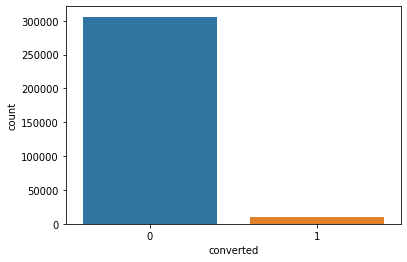

In [229]:
sns.countplot(conversion["converted"],data=conversion);
plt.savefig('graphs/converted')

Over 316 000 users only few make the conversion, about 3.2%. So it's interesting to analyse this data to advise marketing and products team about new strategies.

##### Ages

In [5]:
print(conversion[conversion["age"]==111])
print(conversion[conversion["age"]==123])

       country  age  new_user source  total_pages_visited  converted
295581      UK  111         0    Ads                   10          1
       country  age  new_user source  total_pages_visited  converted
90928  Germany  123         0    Seo                   15          1


2 users entered false ages. I have a lot of data, so i drop those two lines.

In [6]:
conversion = conversion.drop([90928,295581])

In [50]:
conversion["age"].describe()

count    316198.000000
mean         30.569311
std           8.268958
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max          79.000000
Name: age, dtype: float64

In [51]:
conversion[conversion["converted"]==1]["age"].describe()

count    10198.000000
mean        26.529025
std          6.937305
min         17.000000
25%         21.000000
50%         25.000000
75%         31.000000
max         61.000000
Name: age, dtype: float64

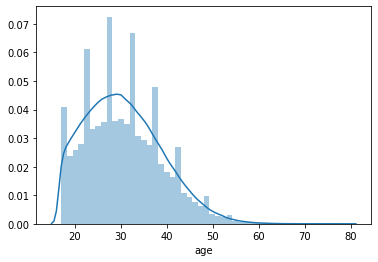

In [246]:
sns.distplot(conversion["age"]);
plt.savefig('graphs/age')

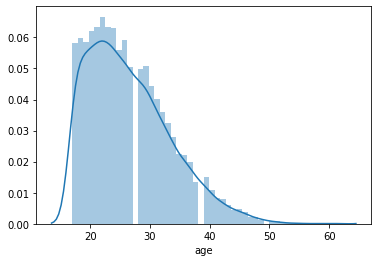

In [247]:
sns.distplot(conversion[conversion["converted"]==1]["age"]);
plt.savefig('graphs/age¨converted')

Average age is 30 years old. For those who convert the average is 26 years old.

##### Countries

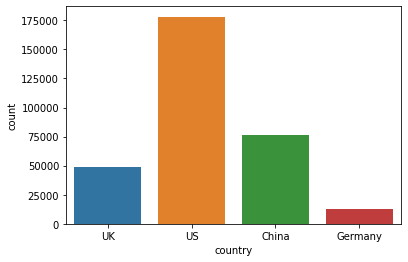

In [244]:
sns.countplot("country",data=conversion);
plt.savefig("graphs/countries")

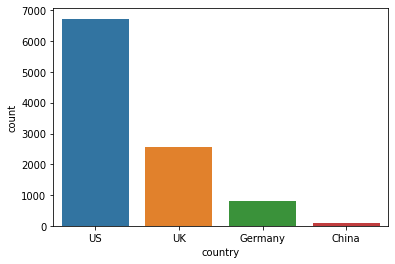

In [245]:
sns.countplot(conversion[conversion["converted"]==1]["country"]);
plt.savefig("graphs/countries")

Majority of americans users, followed by chineses. However, when it comes to converting the chineses are last.

##### New user

In [147]:
conversion["new_user"].value_counts()

1    216744
0     99454
Name: new_user, dtype: int64

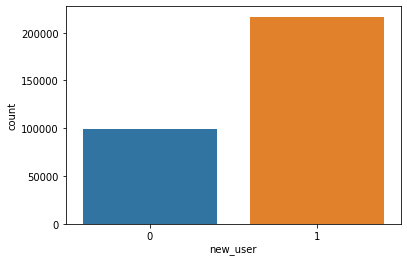

In [248]:
sns.countplot("new_user",data=conversion);
plt.savefig("graphs/new_user")

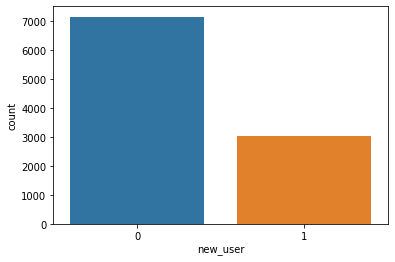

In [249]:
sns.countplot(conversion[conversion["converted"]==1]["new_user"]);
plt.savefig("graphs/new_user_c")

Majority of clients are new users on the website. However, when it comes to converting more are old users

##### Pages visited

In [84]:
conversion["total_pages_visited"].describe()

count    316198.000000
mean          4.872918
std           3.341053
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

In [225]:
conversion[conversion["converted"]==1]["total_pages_visited"].describe()

count    10198.000000
mean        14.553932
std          3.963522
min          2.000000
25%         12.000000
50%         14.000000
75%         17.000000
max         29.000000
Name: total_pages_visited, dtype: float64

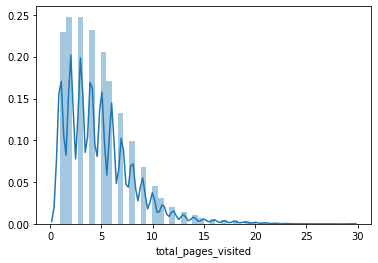

In [251]:
sns.distplot(conversion["total_pages_visited"]);
plt.savefig("graphs/pv")

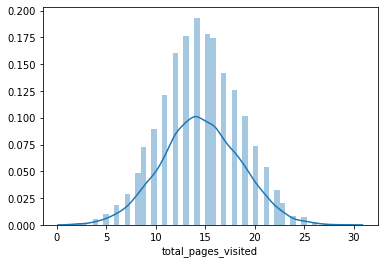

In [250]:
sns.distplot(conversion[conversion["converted"]==1]["total_pages_visited"]);
plt.savefig("graphs/pv_c")

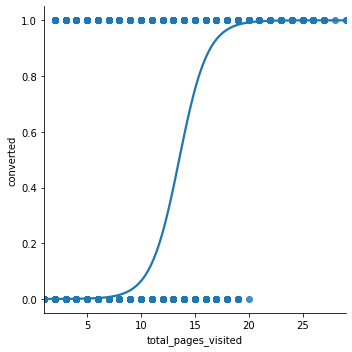

In [258]:
sns.lmplot("total_pages_visited","converted",data=conversion, logistic=True)
plt.savefig('graphs/log')

Definitely spending more time on the site implies higher probability of conversion!

##### Sources

In [88]:
conversion["source"].value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

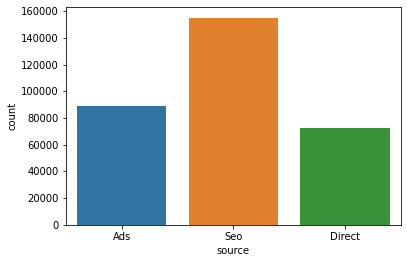

In [252]:
sns.countplot("source",data=conversion);
plt.savefig("graphs/source")

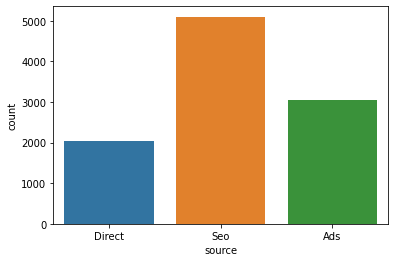

In [253]:
sns.countplot("source",data=conversion[conversion["converted"]==1]);
plt.savefig("graphs/source_c")

Majority of clients visit the website thanks to SEO techniques (Search Engine Optimization).

# Mise en place des modèles de prédiction 

In [7]:
X = conversion.iloc[:,:-1]
y = conversion.iloc[:,-1:]

In [8]:
X

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6
...,...,...,...,...,...
316195,US,26,1,Ads,9
316196,US,27,1,Direct,6
316197,China,25,0,Ads,4
316198,US,22,0,Seo,4


In [9]:
X = pd.get_dummies(X)

In [10]:
X

,age,new_user,total_pages_visited,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,1,0,1,0,0
1,23,1,5,0,0,0,1,0,0,1
2,28,1,4,0,0,0,1,0,0,1
3,39,1,5,1,0,0,0,0,0,1
4,30,1,6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,0,1,1,0,0
316196,27,1,6,0,0,0,1,0,1,0
316197,25,0,4,1,0,0,0,1,0,0
316198,22,0,4,0,0,0,1,0,0,1


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify = y)

In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Logistic Regression 

In [13]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
%time clf_logistic.fit(X_train,y_train)

CPU times: user 661 ms, sys: 15.2 ms, total: 676 ms
Wall time: 368 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
print(clf_logistic.score(X_train,y_train))
clf_logistic.score(X_test,y_test)

0.9860710768146455


0.9863904701665612

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf_logistic,X_test, y_test, cv=10).mean()

0.9862639679527726

### Matrice de confusion

In [16]:
y_pred_logistic = clf_logistic.predict(X_test)

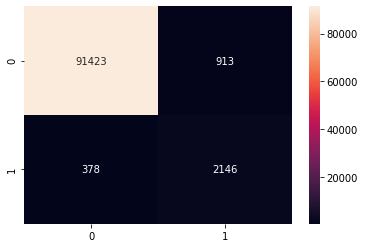

In [17]:
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_pred_logistic, y_test)
sns.heatmap(cm_logistic, annot=True, fmt="d")
plt.savefig('graphs/cm_logistic')

In [18]:
cm_logistic.sum()

94860

In [19]:
print("Accuracy : {}%".format(round(((cm_logistic[0,0]+cm_logistic[1,1])/cm_logistic.sum()),4)*100))

Accuracy : 98.64%


### Courbe ROC, AUC

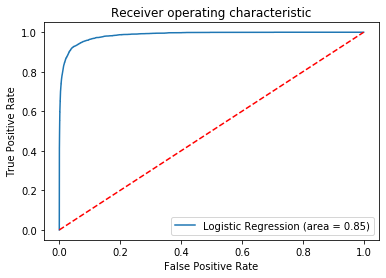

In [20]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, clf_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_logistic.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Classement des features les plus importants

In [99]:
from sklearn.feature_selection import chi2
feature_importance = chi2(X, y)
feature_importance 

(array([5.62718512e+03, 2.30802259e+03, 2.02677372e+05, 2.34645220e+03,
        3.80880794e+02, 6.43466067e+02, 1.75677270e+02, 1.40112465e+01,
        3.86797846e+01, 2.01277614e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        8.00200871e-085, 5.89011424e-142, 4.25902331e-040, 1.81720465e-004,
        4.99354137e-010, 1.55979667e-001]))

In [100]:
feature_ranking = pd.DataFrame(columns=X.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending=False)
feature_ranking

,Chi2 Score,P-value
total_pages_visited,202677.371688,0.000000e+00
age,5627.185122,0.000000e+00
country_China,2346.452197,0.000000e+00
new_user,2308.022594,0.000000e+00
country_UK,643.466067,5.890114e-142
country_Germany,380.880794,8.002009e-85
country_US,175.677270,4.259023e-40
source_Direct,38.679785,4.993541e-10
source_Ads,14.011246,1.817205e-04
source_Seo,2.012776,1.559797e-01


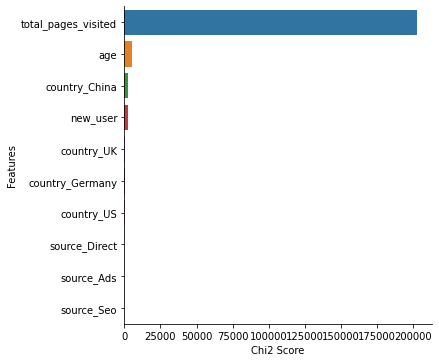

In [101]:
ax =sns.catplot(x="Chi2 Score", y=[index for index in feature_ranking.index], data = feature_ranking.sort_values("Chi2 Score", ascending=False), kind="bar")
ax.set(xlabel="Chi2 Score", ylabel="Features")
plt.show()

It seems most important feature is the number of pages visited by users.

## Decison Tree

### "Gini"

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
clf_gini.score(X_train,y_train)

0.9885017484571108

In [24]:
clf_gini.score(X_test,y_test)

0.9838498840396374

In [25]:
y_pred_gini = clf_gini.predict(X_test)

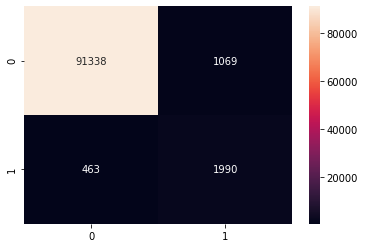

In [28]:
cm_gini = confusion_matrix(y_pred_gini, y_test)
sns.heatmap(cm_gini, annot=True, fmt="d")

In [36]:
print("False positive rate {}%".format(round(cm_gini[1,0]/(cm_gini[1,0]+cm_gini[1,1]),4)*100))
print("False negative rate {}%".format(round(cm_gini[0,1]/(cm_gini[0,0]+cm_gini[0,1]),4)*100))

False positive rate 18.87%
False negative rate 1.16%


### "Entropy"

In [39]:
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
y_pred_entropy = clf_entropy.predict(X_test)

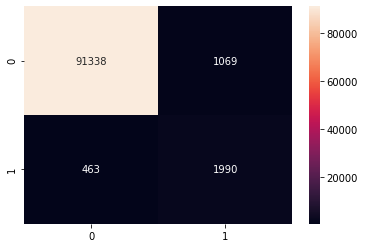

In [41]:
cm_entropy = confusion_matrix(y_pred_entropy, y_test)
sns.heatmap(cm_gini, annot=True, fmt="d")

In [42]:
print("False positive rate {}%".format(round(cm_entropy[1,0]/(cm_gini[1,0]+cm_entropy[1,1]),4)*100))
print("False negative rate {}%".format(round(cm_entropy[0,1]/(cm_gini[0,0]+cm_entropy[0,1]),4)*100))

False positive rate 18.78%
False negative rate 1.1400000000000001%


**Difference between gini et entropy:**

In [45]:
count = 0
for i in range(0, len(y_pred_gini)):
  
  if y_pred_gini[i] != y_pred_entropy[i]:
    count+= 1
    

print("{} elements differently classified".format(count))
print("{}% of differences".format(np.round(count/len(y_pred_gini), 4)*100))

42 elements differently classified
0.04% of differences


## Random Forest

In [197]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_train, y_train)

0.9885017484571108

In [198]:
y_pred_rf = clf_rf.predict(X_test)

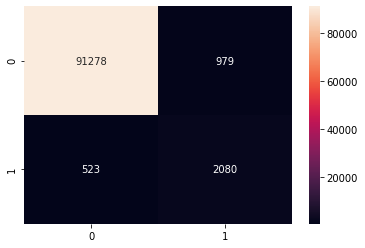

In [199]:
cm_forest = confusion_matrix(y_pred_rf, y_test)
sns.heatmap(cm_forest, annot=True, fmt="d")

In [204]:
feature_importance_2 = clf_rf.feature_importances_
feature_importance_2 

array([0.11584191, 0.03838537, 0.80399064, 0.02296067, 0.00262756,
       0.00371162, 0.0042146 , 0.00270664, 0.00270463, 0.00285637])

In [210]:
feature_ranking_2 = pd.DataFrame(
    {'features':X.columns,'importance':feature_importance_2}).sort_values("importance",ascending=False)
feature_ranking_2

,features,importance
2,total_pages_visited,0.803991
0,age,0.115842
1,new_user,0.038385
3,country_China,0.022961
6,country_US,0.004215
5,country_UK,0.003712
9,source_Seo,0.002856
7,source_Ads,0.002707
8,source_Direct,0.002705
4,country_Germany,0.002628


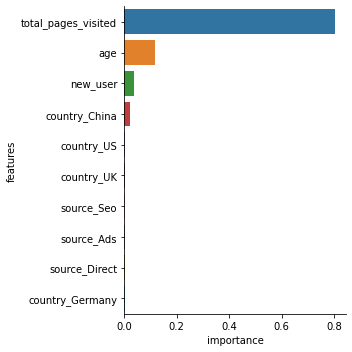

In [257]:
sns.catplot("importance","features",data=feature_ranking_2,kind="bar");
plt.savefig('graphs/features_importances')

Same, with "feature_importances_" of Random Forest model, the most important feature is still the total pages visited.

## Naive Bayes 

In [214]:
import sklearn.naive_bayes as nb
naivebayes = nb.GaussianNB()
naivebayes.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [216]:
naivebayes.score(X_test,y_test)

0.9641049968374447

## Conclusion

The 4 models give very close results. Logistic Regression is still the best with a 98.64% accuracy score.

Most important feature is 'total_pages_visited'. It looks like there is a positive relation between the total pages vidited and the conversion. 

From 13-14 visited pages, the user has a good chance to convert.

The marketing team should make te website even more attractive to make users stay and visit new pages.

Second most important feature is age. I recommanded the marketing team to target a young clientele.

Finnaly the company should create a chinese version of the website. This could explain the fact that the large number of chinese users don't convert. 